In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_context("notebook")

daily = pd.read_parquet("../../data/processed/clean_daily.parquet")
monthly = pd.read_parquet("../../data/processed/clean_monthly.parquet")

print("Daily shape:", daily.shape)
print("Monthly shape:", monthly.shape)

daily.head(2)


FileNotFoundError: [Errno 2] No such file or directory: '../../data/processed/clean_daily.parquet'

In [5]:
# --- 1. Load data ---
DAILY_PATH   = "../data/processed/clean_daily.parquet"
MONTHLY_PATH = "../data/processed/clean_monthly.parquet"

daily   = pd.read_parquet(DAILY_PATH)
monthly = pd.read_parquet(MONTHLY_PATH)

print("Daily shape:", daily.shape)
print("Monthly shape:", monthly.shape)

Daily shape: (23636, 13)
Monthly shape: (179, 11)


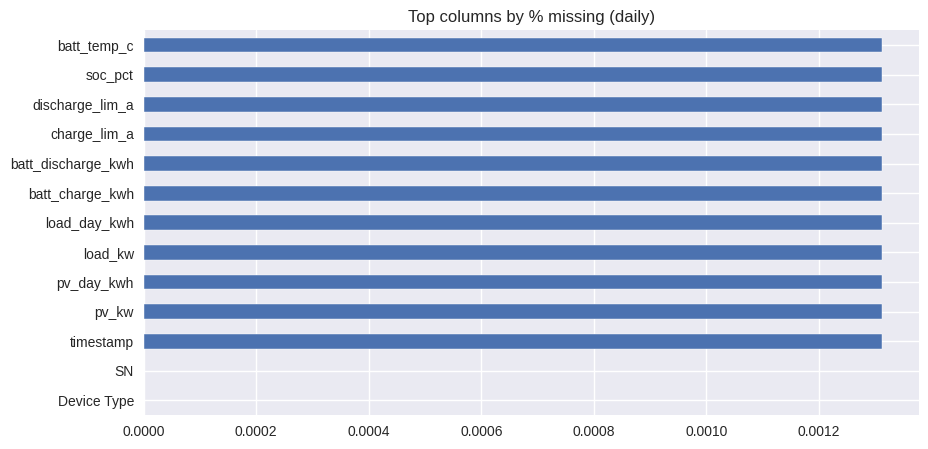

In [6]:
# --- 2. Missing-value overview ---
fig, ax = plt.subplots(figsize=(10, 5))
daily.isna().mean().sort_values().tail(15).plot.barh(ax=ax)
ax.set_title("Top columns by % missing (daily)");


In [7]:
# --- 3. Summary statistics ---
display(daily.describe().T.head(15))
display(monthly.describe().T)


,count,mean,std,min,25%,50%,75%,max
Device Type,23636.0,<NA>,<NA>,inf,<NA>,<NA>,<NA>,-inf
SN,23636.0,2407126799.0,0.0,2407126799.0,2407126799.0,2407126799.0,2407126799.0,2407126799.0
pv_kw,23605.0,0.303657,0.610602,0.0,0.0,0.0,0.31,5.852
pv_day_kwh,23605.0,<NA>,<NA>,0.0,0.0,1.7,6.1,16.0
load_kw,23605.0,0.59353,0.70672,0.023,0.237,0.35,0.552,6.576
load_day_kwh,23605.0,<NA>,<NA>,0.0,2.1,5.1,9.6,23.9
batt_charge_kwh,23605.0,311.117352,79.411445,173.5,245.7,300.9,379.5,448.1
batt_discharge_kwh,23605.0,176.866956,56.910861,78.1,130.4,167.2,225.9,273.5
charge_lim_a,23605.0,18.714467,36.977831,0.0,0.0,0.0,20.0,100.0
discharge_lim_a,23605.0,99.331921,2.496943,90.0,100.0,100.0,100.0,100.0


,count,mean,std,min,25%,50%,75%,max
SN,179.0,2407126799.0,0.0,2407126799.0,2407126799.0,2407126799.0,2407126799.0,2407126799.0
Parent Device,179.0,2980079880.0,0.0,2980079880.0,2980079880.0,2980079880.0,2980079880.0,2980079880.0
Production(kWh),179.0,4.796648,3.926414,0.0,1.15,4.3,7.85,16.0
Grid Feed-in(kWh),179.0,1.069274,1.842874,0.0,0.0,0.2,1.3,10.8
Consumption(kWh),179.0,15.323464,4.137375,5.0,12.8,15.0,17.8,43.9
Electricity Purchasing(kWh),179.0,12.401117,5.092283,1.7,9.45,11.9,15.3,44.4
Charging Capacity(kWh),179.0,2.272067,1.681392,0.6,0.7,1.7,3.35,7.1
Discharging Capacity(kWh),179.0,1.467039,1.57515,0.0,0.0,0.9,2.5,6.1
Generator Power Generation(kWh),179.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


KeyError: 'grid_kw'

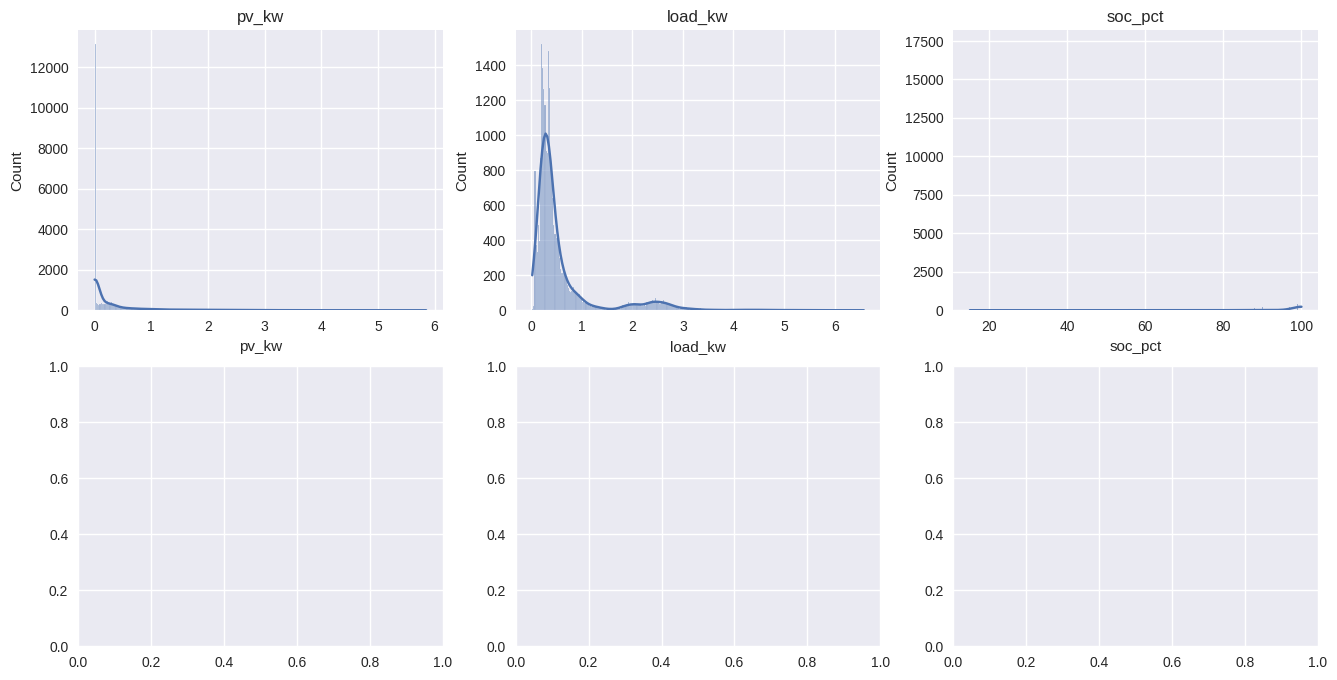

In [8]:
# --- 4. Distributions of key features ---
key_feats = ["pv_kw", "load_kw", "soc_pct", "grid_kw",
             "batt_power_kw", "batt_temp_c"]

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
for ax, feat in zip(axes.flatten(), key_feats):
    sns.histplot(daily[feat], kde=True, ax=ax)
    ax.set_title(feat)
plt.tight_layout();



In [9]:
# --- 6. Correlation heatmap (numeric only) ---
corr = daily[["pv_kw", "load_kw", "soc_pct",
              "grid_kw", "batt_power_kw"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature correlation (daily)");

KeyError: "['grid_kw', 'batt_power_kw'] not in index"